In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("BARMM_only.csv")

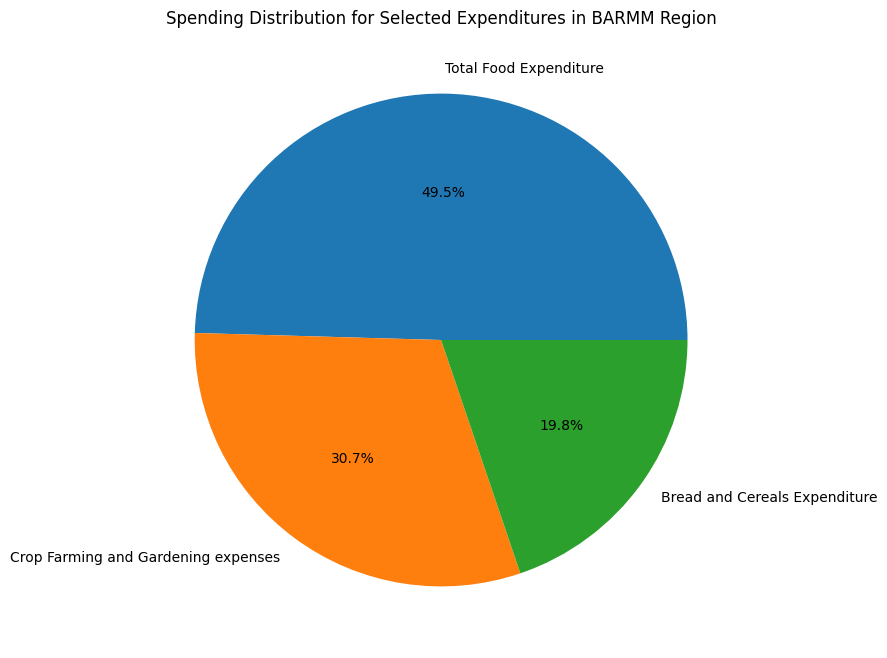

In [3]:
labels = [
    "Total Food Expenditure",
    "Crop Farming and Gardening expenses",
    "Bread and Cereals Expenditure",
]

values = [
    64931.270463,
    40188.647242,
    25933.379448,
]

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Spending Distribution for Selected Expenditures in BARMM Region")
plt.show()


<h2><b>INSIGHT<b></h2>
<h4>According to out dataset, BARMM region has the lowest income among all regions . Phillippines. And here are the top 5 expendetures. First is Total Food, it is very common since this is a basic needs of people. Next is Crop Farming And Gardening. And according to International Labour Organization ( ILO ) the most common job in BARMM Region is Argiculture / Farming which is the reason why crop and farming is the second when it come to their expenses. The third one is bread and cereals same with food expenditure it is one of the basic need oa </h4>


The Bangsamoro Autonomous Region in Muslim Mindanao, or BARMM Region, has the lowest average household income of any region in the Philippines, according to the dataset.  The top three spending categories for households in BARMM are displayed in the pie graphic.

 Total Food Expenditure is the biggest expense, which makes sense given that food is a basic need and typically accounts for the largest portion of spending, particularly in low-income areas.

 Crop farming and gardening expenses rank second in terms of cost.  This is consistent with research from the International Labor Organization (ILO), which indicates that labor related to agriculture and farming is the most prevalent source of income in BARMM.  A large amount of their income is spent on seeds, tools, fertilizer, and other agricultural inputs as many households are farmers.

 The significance of food security in the area is also shown in the third-largest category, Bread and Cereals Expenditure.  As staple foods in Filipino households, bread, cereals, and rice naturally make up a significant portion of household expenditures.

 Overall, BARMM's spending pattern shows that households prioritize basic necessities like food and farming, which is in line with the region's socioeconomic traits.

Pearson correlation (Income vs Food): 0.67


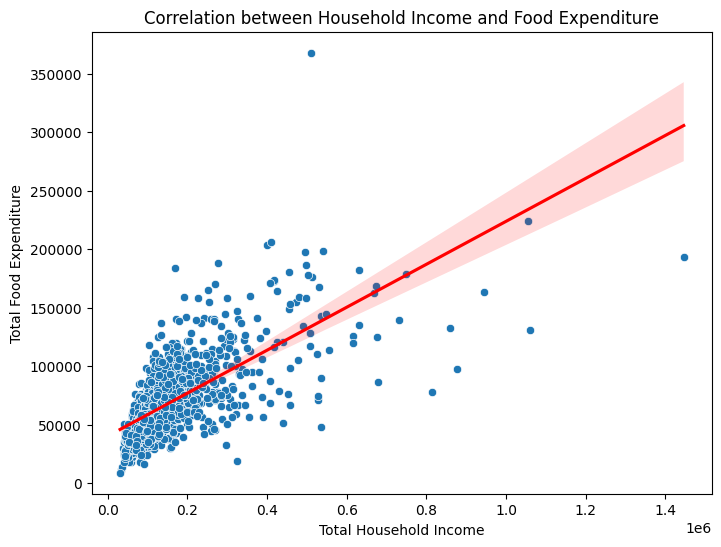

In [4]:
df_food = df[['Total Household Income', 'Total Food Expenditure']].dropna()

# Correlation
corr_income_food = df_food['Total Household Income'].corr(df_food['Total Food Expenditure'])
print(f"Pearson correlation (Income vs Food): {corr_income_food:.2f}")

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_food, x='Total Household Income', y='Total Food Expenditure')
sns.regplot(data=df_food, x='Total Household Income', y='Total Food Expenditure', scatter=False, color='red')
plt.title('Correlation between Household Income and Food Expenditure')
plt.xlabel('Total Household Income')
plt.ylabel('Total Food Expenditure')
plt.show()

Pearson correlation (Total Vehicles vs Transportation Expenditure): 0.42


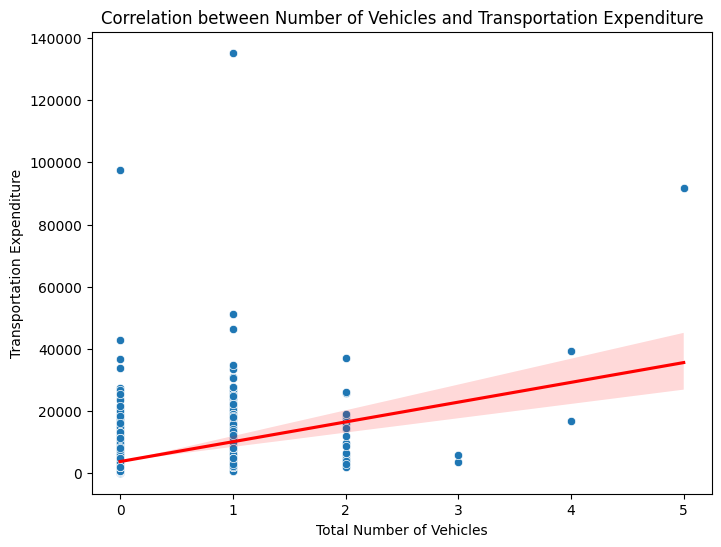

In [5]:
df['Total Vehicles'] = df[['Number of Car, Jeep, Van', 'Number of Motorcycle/Tricycle', 'Number of Motorized Banca']].sum(axis=1)

df_veh_trans = df[['Total Vehicles', 'Transportation Expenditure']].dropna()

# Correlation
corr_veh_trans = df_veh_trans['Total Vehicles'].corr(df_veh_trans['Transportation Expenditure'])
print(f"Pearson correlation (Total Vehicles vs Transportation Expenditure): {corr_veh_trans:.2f}")

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_veh_trans, x='Total Vehicles', y='Transportation Expenditure')
sns.regplot(data=df_veh_trans, x='Total Vehicles', y='Transportation Expenditure', scatter=False, color='red')
plt.title('Correlation between Number of Vehicles and Transportation Expenditure')
plt.xlabel('Total Number of Vehicles')
plt.ylabel('Transportation Expenditure')
plt.show()

Pearson correlation (House Floor Area vs Income): 0.13


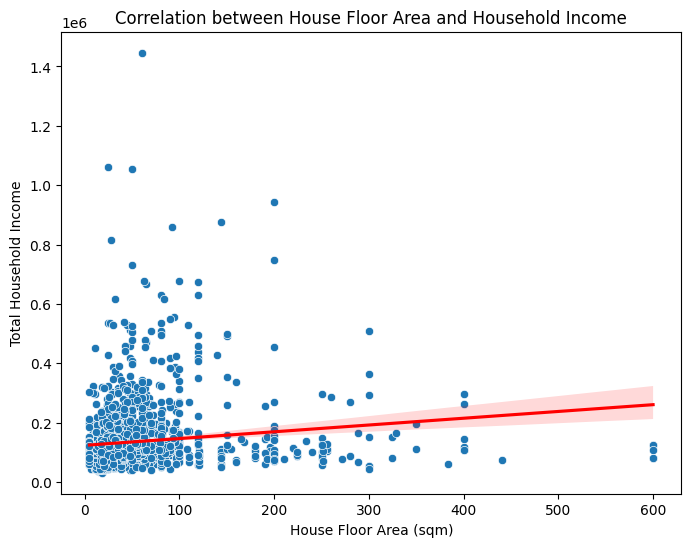

In [6]:
df_floor_income = df[['House Floor Area', 'Total Household Income']].dropna()

# Correlation
corr_floor_income = df_floor_income['House Floor Area'].corr(df_floor_income['Total Household Income'])
print(f"Pearson correlation (House Floor Area vs Income): {corr_floor_income:.2f}")

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_floor_income, x='House Floor Area', y='Total Household Income')
sns.regplot(data=df_floor_income, x='House Floor Area', y='Total Household Income', scatter=False, color='red')
plt.title('Correlation between House Floor Area and Household Income')
plt.xlabel('House Floor Area (sqm)')
plt.ylabel('Total Household Income')
plt.show()


Average Total Assets by Main Source of Income:
 Main Source of Income
Wage/Salaries                 2.576087
Other sources of Income       1.952756
Enterpreneurial Activities    1.236737
Name: Total Assets, dtype: float64


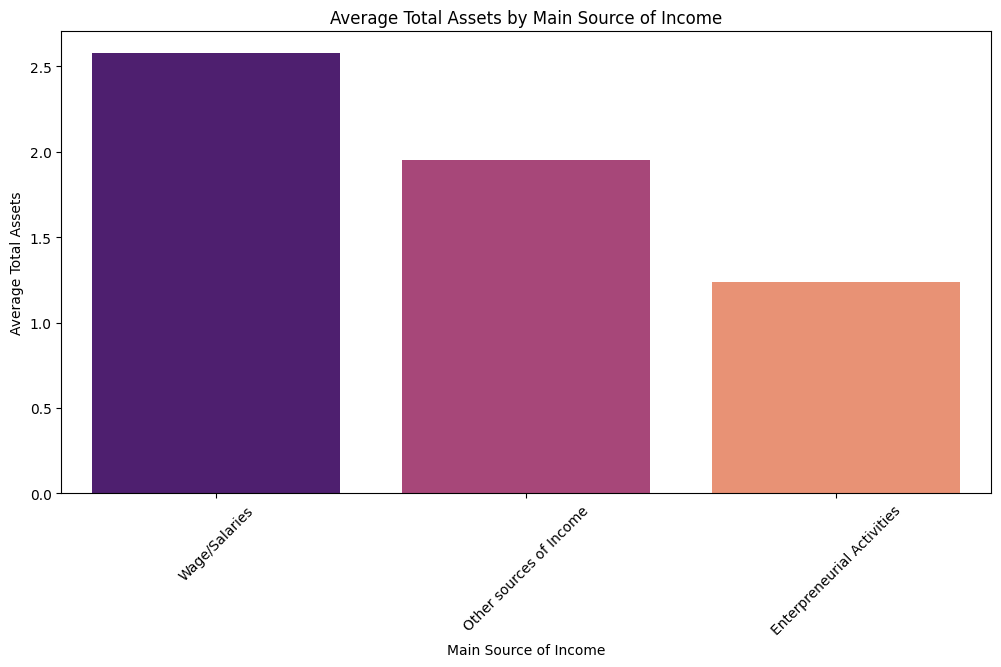

In [7]:
df.columns = df.columns.str.strip()  # Clean column names

# Create a 'Total Assets' column (sum of all assets/vehicles)
asset_cols = [
    'Number of Refrigerator/Freezer', 'Number of Washing Machine', 'Number of Airconditioner',
    'Number of Car, Jeep, Van', 'Number of Landline/wireless telephones', 'Number of Cellular phone',
    'Number of Personal Computer', 'Number of Stove with Oven/Gas Range', 'Number of Motorized Banca',
    'Number of Motorcycle/Tricycle'
]

df['Total Assets'] = df[asset_cols].sum(axis=1)

# Group by Main Source of Income
income_assets = df.groupby('Main Source of Income')['Total Assets'].mean().sort_values(ascending=False)
print("Average Total Assets by Main Source of Income:\n", income_assets)

# Visualization: Bar plot of Total Assets by Main Source of Income
plt.figure(figsize=(12,6))
sns.barplot(x=income_assets.index, y=income_assets.values, palette="magma")
plt.title("Average Total Assets by Main Source of Income")
plt.ylabel("Average Total Assets")
plt.xlabel("Main Source of Income")
plt.xticks(rotation=45)
plt.show()

<hr>

<h1>PREDICTIVE</h1>

<hr>

MSE: 282901473.69, R^2: 0.63


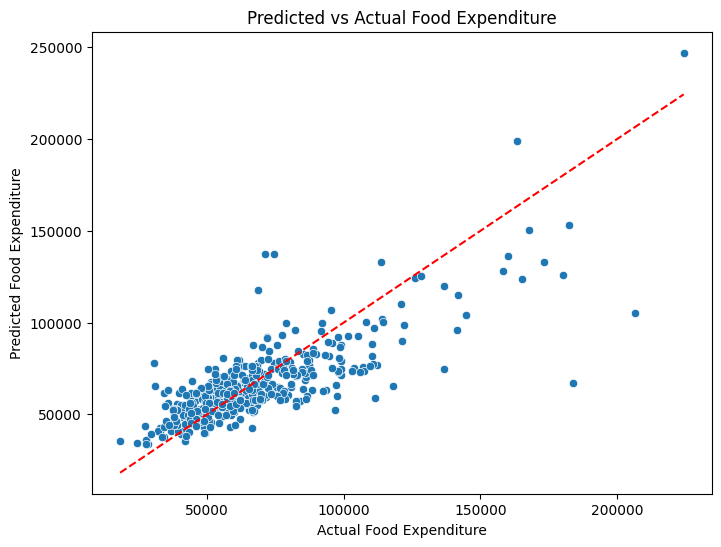

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
X = df[['Total Household Income', 'Total Number of Family members']].dropna()
y = df.loc[X.index, 'Total Food Expenditure']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, R^2: {r2:.2f}')

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Food Expenditure')
plt.ylabel('Predicted Food Expenditure')
plt.title('Predicted vs Actual Food Expenditure')
plt.show()


MSE: 0.09, R^2: 0.07


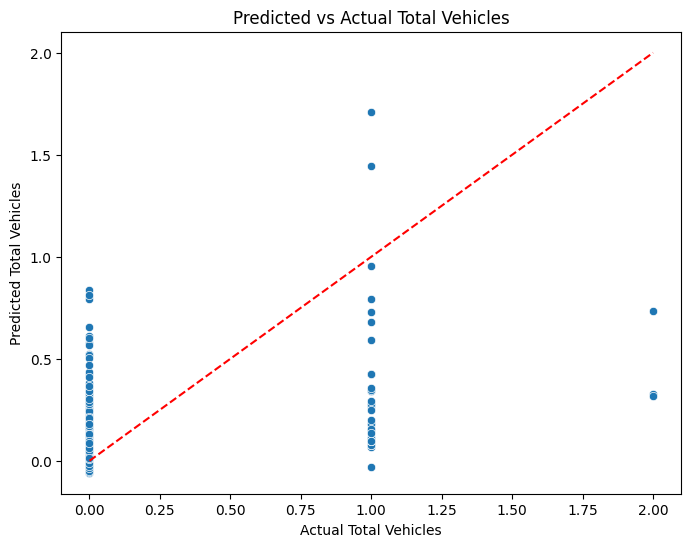

In [9]:
# Total vehicles
df['Total Vehicles'] = df[['Number of Car, Jeep, Van', 'Number of Motorcycle/Tricycle', 'Number of Motorized Banca']].sum(axis=1)

# Prepare data
X2 = df[['Total Household Income', 'Total Number of Family members', 'House Floor Area']].dropna()
y2 = df.loc[X2.index, 'Total Vehicles']

# Split train/test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train Linear Regression
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Predictions
y2_pred = model2.predict(X2_test)

# Metrics
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
print(f'MSE: {mse2:.2f}, R^2: {r2_2:.2f}')

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=y2_test, y=y2_pred)
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--')
plt.xlabel('Actual Total Vehicles')
plt.ylabel('Predicted Total Vehicles')
plt.title('Predicted vs Actual Total Vehicles')
plt.show()


<hr>

<h1>DIAGNOSTIC</h1>

<hr>

Why do households with more appliances (TV, computers, refrigerators, washing machines) have higher electricity consumption expenditure?

                  Total_Appliances  Electricity
Total_Appliances          1.000000     0.492627
Electricity               0.492627     1.000000


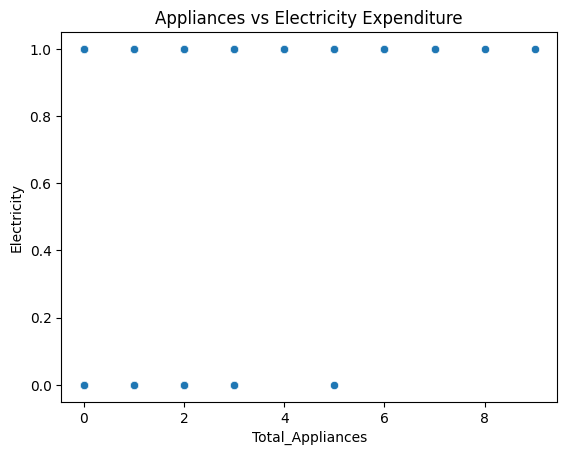

Total_Appliances
0    0.262995
1    0.895805
2    0.897059
3    0.926829
4    1.000000
5    0.857143
6    1.000000
7    1.000000
8    1.000000
9    1.000000
Name: Electricity, dtype: float64


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a combined count of appliances
df["Total_Appliances"] = (
    df["Number of Television"] +
    df["Number of Personal Computer"] +
    df["Number of Refrigerator/Freezer"] +
    df["Number of Washing Machine"]
)

# Correlation
print(df[["Total_Appliances", "Electricity"]].corr())

# Scatter Plot
sns.scatterplot(data=df, x="Total_Appliances", y="Electricity")
plt.title("Appliances vs Electricity Expenditure")
plt.show()

# Group comparison
print(df.groupby("Total_Appliances")["Electricity"].mean())


                          Household Head Age  Medical Care Expenditure
Household Head Age                  1.000000                  0.112073
Medical Care Expenditure            0.112073                  1.000000


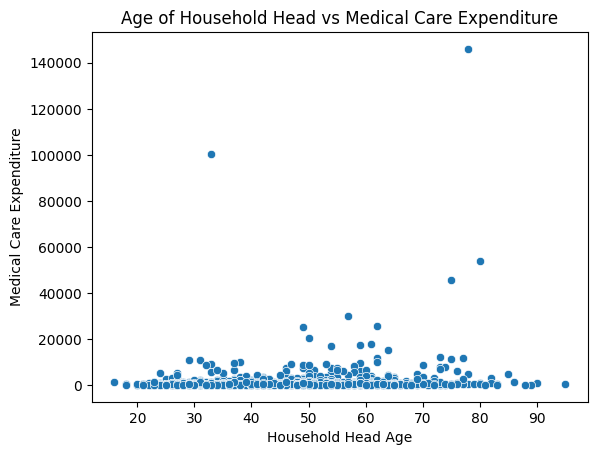

Age_Group
<30       506.210938
30-45     644.577535
45-60     843.208499
60+      2317.828326
Name: Medical Care Expenditure, dtype: float64


In [29]:
# Correlation
print(df[["Household Head Age", "Medical Care Expenditure"]].corr())

# Scatter Plot
sns.scatterplot(data=df, x="Household Head Age", y="Medical Care Expenditure")
plt.title("Age of Household Head vs Medical Care Expenditure")
plt.show()

# Group by Age Brackets
df["Age_Group"] = pd.cut(df["Household Head Age"],
                         bins=[0,30,45,60,120],
                         labels=["<30","30-45","45-60","60+"])

print(df.groupby("Age_Group")["Medical Care Expenditure"].mean())


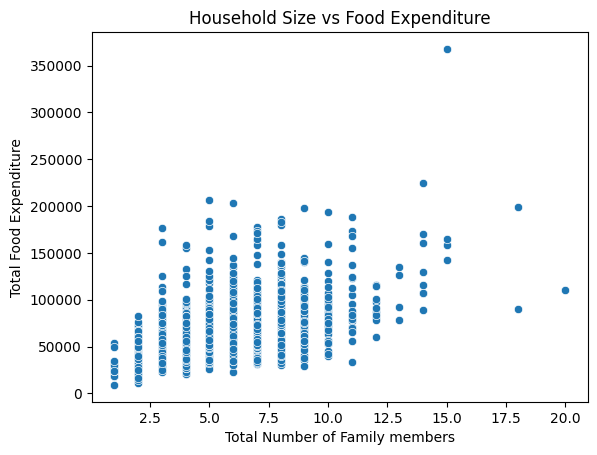

In [32]:

sns.scatterplot(data=df, 
                x="Total Number of Family members", 
                y="Total Food Expenditure")
plt.title("Household Size vs Food Expenditure")
plt.show()




Average spending with/without children under 5:
            Bread and Cereals Expenditure  Total Rice Expenditure  \
Has_Under5                                                          
0                            25661.957084             19653.05109   
1                            26444.210256             20964.60641   

            Meat Expenditure  Total Fish and  marine products Expenditure  \
Has_Under5                                                                  
0                2250.509537                                 13087.472071   
1                2263.544872                                 11694.035897   

            Fruit Expenditure  Vegetables Expenditure  \
Has_Under5                                              
0                 2638.236376             5331.157357   
1                 2498.946154             5251.735897   

            Restaurant and hotels Expenditure  
Has_Under5                                     
0                                 4571.6

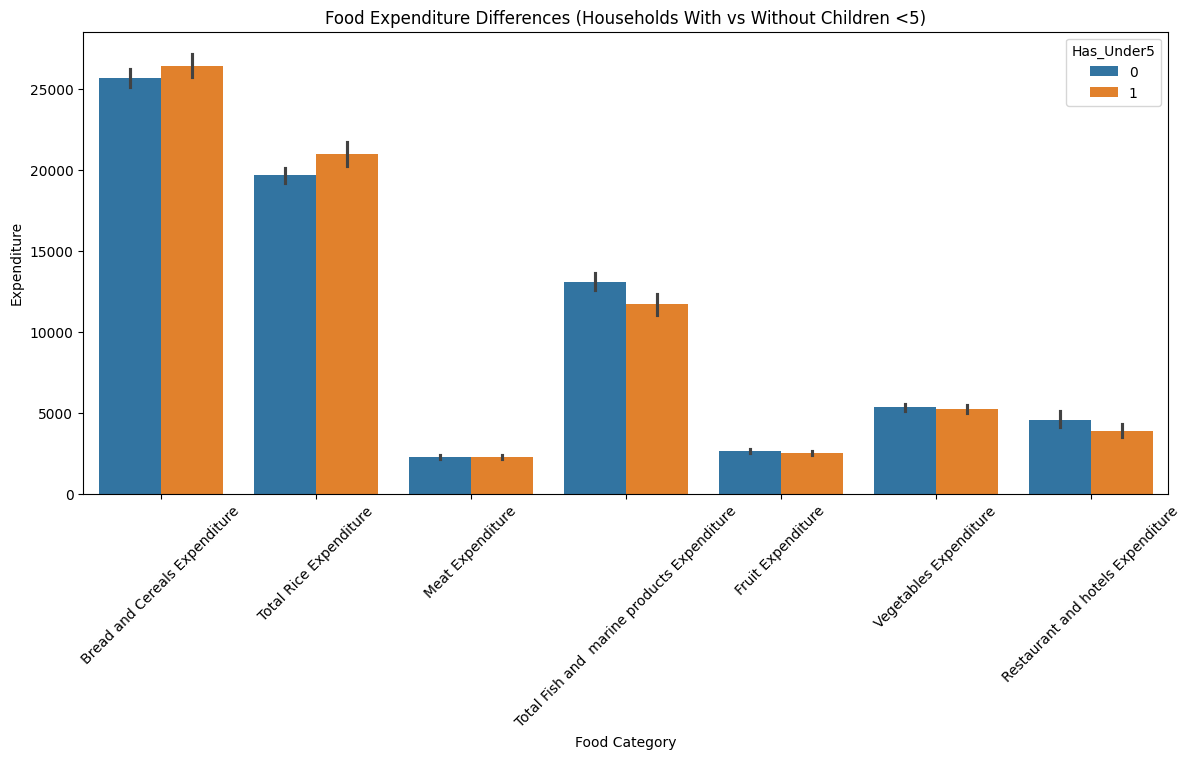

In [36]:
df["Has_Under5"] = df["Members with age less than 5 year old"].apply(lambda x: 1 if x > 0 else 0)

# ---------------------------------------------------------
# 2. Compare average spending across food categories
# ---------------------------------------------------------
food_cols = [
    "Bread and Cereals Expenditure",
    "Total Rice Expenditure",
    "Meat Expenditure",
    "Total Fish and  marine products Expenditure",
    "Fruit Expenditure",
    "Vegetables Expenditure",
    "Restaurant and hotels Expenditure"
]

print("\nAverage spending with/without children under 5:")
print(df.groupby("Has_Under5")[food_cols].mean())

# ---------------------------------------------------------
# 3. Visualize differences (long-form melt)
# ---------------------------------------------------------
df_melt = df[["Has_Under5"] + food_cols].melt(id_vars="Has_Under5",
                                              var_name="Food Category",
                                              value_name="Expenditure")

plt.figure(figsize=(14,6))
sns.barplot(data=df_melt, x="Food Category", y="Expenditure", hue="Has_Under5")
plt.xticks(rotation=45)
plt.title("Food Expenditure Differences (Households With vs Without Children <5)")
plt.show()